# Clustering

### Import packages and create data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns

In [2]:
np.random.seed(70)

In [3]:
x1 = np.random.normal(1, 1, (30,2))
x2 = np.random.normal(5, 1, (30,2))
# x3 = np.random.normal(2,1,(30,2))

In [4]:
data = np.concatenate([x1, x2])

Text(0, 0.5, 'feature2')

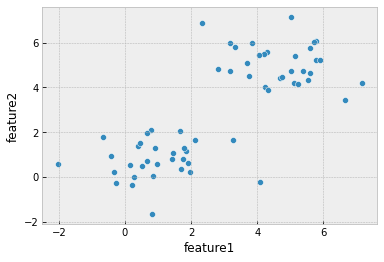

In [5]:
sns.scatterplot(x=data[:,0], y=data[:,1])
plt.xlabel('feature1')
plt.ylabel('feature2')

## k-means clustering

### Implement KMeans manually from scratch (vectorized)

K-means algorithm:

We start by picking k points at random to serve as the center of the k clusters we want to build. Then:
1. Assign each of the points to the cluster whose centroid they are closest to
2. Compute the new centroids of each of the k clusters (average coordinates)

Repeat this until convergence, or until you've reached a pre-determined number of iterations.

In [6]:
class KMeansSelfmade:
    def __init__(self, data: np.array, n_cluster: int):
        self.data = data
        self.n_cluster = n_cluster
        self.centroid_positions = []
        self.score = 0
        self.labels = np.zeros(data.shape[0])
        
        self.init_centroids(n_cluster)
        
    def init_centroids(self, n_cluster):
        """
        Setup centroids in random positions
        """
        self.centroid_positions = np.random.random((n_cluster, 2))*10
        
    def do_step(self):
        """
        Calculate distances, assign cluster, plot progress, calculate score, and move centroids
        """
        distances = self.get_distances()
        self.assign_clusters(distances)
        self.plot_progress()
        self.get_score(distances)
        self.move_centroids()
    
    def get_distances(self):
        """
        Calculate distances to the designated centroids
        """
        distances=n

In [7]:
class KMeansSelfmade:
    def __init__(self, data: np.array, n_cluster: int):
        self.data = data
        self.n_cluster = n_cluster
        self.centroid_positions = []
        self.score = 0
        self.labels = np.zeros(data.shape[0])
        
        self.init_centroids(n_cluster)
        
    def init_centroids(self, n_cluster):
        """
        Setup centroids in random positions
        """
        self.centroid_positions = np.random.random((n_cluster, 2))*10
        
    def do_step(self):
        """
        Calculate distances, assign cluster, plot progress, calculate score, and move centroids
        """
        distances = self.get_distances()
        self.assign_clusters(distances)
        self.plot_progress()
        self.get_score(distances)
        self.move_centroids()
    
    def get_distances(self):
        """
        Calculate distances to the designated centroids
        """
        distances=np.zeros((data.shape[0], self.n_cluster))
        for i in range(self.n_cluster):
            distances[:, i] = np.sqrt(((data-self.centroid_positions[i])**2).sum(axis=1))
        return distances

    def assign_clusters(self, distances):
        """
        Assign data to clusters based on minimal distance to centroid
        """
        self.labels = distances.argmin(axis=1)
        
    def get_score(self, distances):
        """
        Calculate score as sum of distances
        """
        self.score = distances.min(axis=1).sum()
        
    def move_centroids(self):
        """
        Move centroids to mean position of assigned data
        """
        for cluster_index in range(self.n_cluster):
            mask = self.labels == cluster_index
            mean_pos = np.mean(self.data[mask], axis=0)
            self.centroid_positions[cluster_index] = mean_pos
    
    def plot_initial_data(self):
        """
        Plot the data and the initial positions of the centroids
        """
        sns.scatterplot(x=self.data[:,0], y=self.data[:,1], label='data')
        plt.xlabel('feature1')
        plt.ylabel('feature2')
        for i, centroid in enumerate(self.centroid_positions):
            sns.scatterplot(x=[centroid[0]], y=[centroid[1]], label=f'centroid {i+1}', marker='x', s=100)
        plt.show()
    
    def plot_progress(self):
        """
        Plot progress of clustering
        """
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111)
        for cluster_index in range(self.n_cluster):
            mask = self.labels == cluster_index
            ax.scatter(self.data[mask][:,0],self.data[mask][:,1], s=50, label=f'cluster {cluster_index+1}')
            color = next(ax._get_lines.prop_cycler)['color']
            ax.scatter(self.centroid_positions[cluster_index][0], self.centroid_positions[cluster_index][1], s=200, label=f'centroid {cluster_index+1}', marker='x', c=color)
        ax.set_xlabel('feature 1', fontsize=20)
        ax.set_ylabel('feature 2', fontsize=20)
        ax.tick_params('both', labelsize=15)
        ax.legend(fontsize=20)

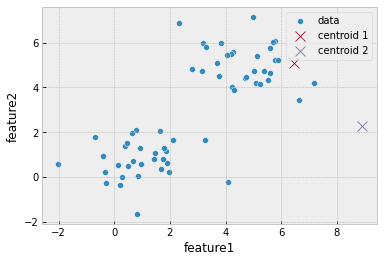

In [8]:
clustering = KMeansSelfmade(data, 2)
clustering.plot_initial_data()

272.03013808382974


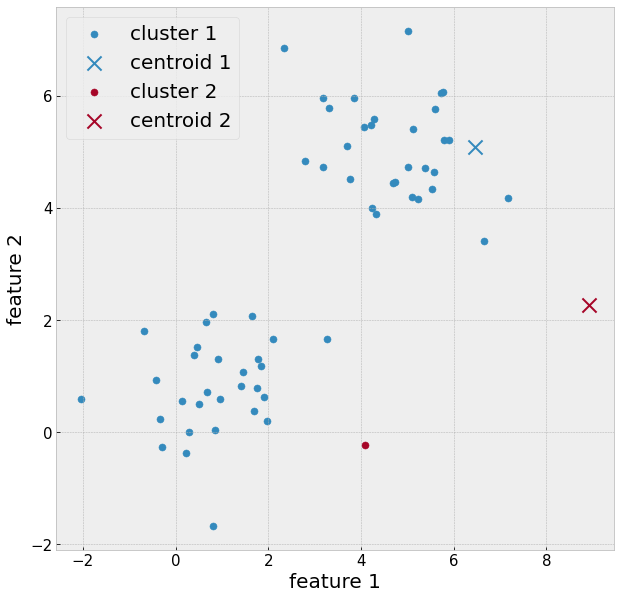

In [9]:
clustering.do_step()
print(clustering.score)

### Use sklearn.KMeans

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=2)
labels_kmeans = kmeans.fit_predict(np.array(data))

In [12]:
kmeans.inertia_

122.64814719432215

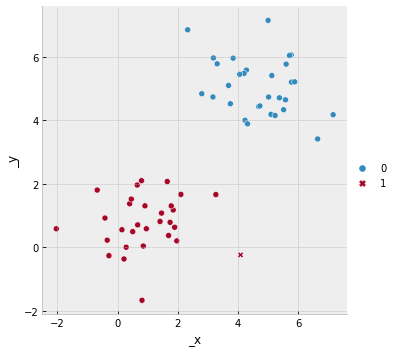

In [13]:
sns.relplot(x=data[:,0], y=data[:,1], hue=labels_kmeans, style=clustering.labels)

In [14]:
score_sklearn = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i).fit(np.array(data))
    score_sklearn.append(kmeans.inertia_)

Problems with k-means clustering:
* need to specify number of clusters, k
* does not account for outliers, every data point is assigned to a cluster.
* sensitive to the initial centroid assignments, non-deterministic

### "Elbow" method to find best number of clusters

Text(0, 0.5, 'inertia')

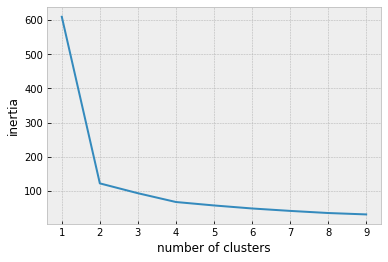

In [15]:
sns.lineplot(x=range(1,10), y=score_sklearn, markers=True)
plt.xlabel('number of clusters')
plt.ylabel('inertia')

## DBSCAN (Density-Based Spatial Clustering of Application with Noise) 

DBSCAN is governed by two parameters only:
* What is the minimum number of points that a cluster can have? `min_samples`
* How close do points have to be to be in a cluster? `eps`

What this also means:
* We do not need to pass number of clusters as a parameter (it is possible to only have one cluster)
* Each point does not need to belong to a cluster (indicates outliers)

DBSCAN algorithm:
1. Pick a random point in the dataset that hasn't yet been visited.
2. If there are at least `min_samples` points within a radius of `eps` to the point then we consider all these points to be part of the same cluster and repeat the step for all these points, until there are no points in the cluster with at least `min_samples` points within a radius of `eps` that haven't been visited.

![DBSCAN](./DBSCAN.png)

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

from sklearn.metrics import pairwise_distances

In [17]:
X, y = make_moons(n_samples=1000, noise=0.15)

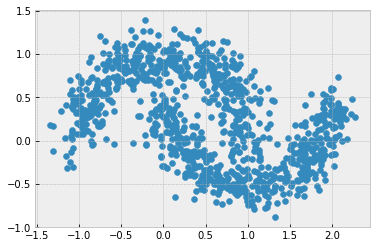

In [18]:
plt.scatter(X[:,0], X[:,1],)

In [67]:
dbscan = DBSCAN(eps=0.080, min_samples=4, metric='euclidean')
labels = dbscan.fit_predict(X)

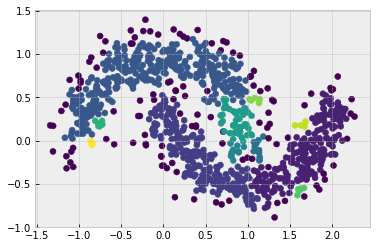

In [68]:
plt.scatter(X[:,0].astype(float),
            X[:, 1].astype(float), 
            c=labels)

Use `labels` to find outliers - they are labeled `-1`    
DBSCAN seems quite sensitive to its parameters. How do we find optimal parameters?     

**How do we find the optimal `min_samples`?**    
`min_samples` should be at least the dimensionality of our dataset plus one. A decent rule of thumb is twice the dimensionality.      

**How do we find the optimal `eps`?**    
Let's try to get a sense for what a typical / average (closest) distance between points in our sample is. We will use the nearest neighbor search for this.



In [69]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
neigbors = nn.fit(X)
distances, indices = neigbors.kneighbors(X)

In [70]:
distances = np.sort(distances, axis=0)[:,1]

Text(0, 0.5, 'distance')

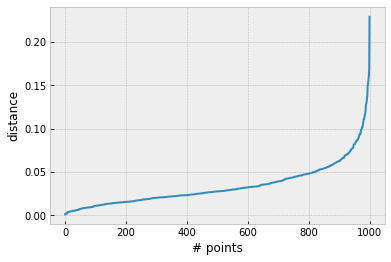

In [71]:
plt.plot(distances)
plt.xlabel('# points')
plt.ylabel('distance')

Problems with DBSCAN:
* Hard to evaluate
* Hard to tune    

Advantages of DBSCAN:
* Do not need to pass the number of clusters
* No restrictions on the shape of clusters
* Deals with outliers

## Silhouette score [-1, 1]

Silhouette score says that our clusters are optimal (silhouette score is close to 1) when intra-cluster points are as close together as possible and the distance between clusters is as large as possible. If we have densely packed clusters which are very far from one another, we can feel confident that we have separated the data into meaningful clusters.

If the clusters are close to one another and/or the points within a cluster are not that close, we can't feel as confident in our classifications (silhouette score is close to -1). Maybe our result was dependent on the specific random points we started with. Maybe we're exaggerating very small and insignificant feature differences between some data points.

For every point:
$$Silhouette = \frac{d_{out} - d_{in}} {max(d_{in}, d_{out})}$$

where 

d_{in}: distance to the centre of the cluster    
d_{out}: distance to the centre of the nearest cluster outside.

The numerator is large when their difference is large. It's negative if d_in is small.

In [72]:
from sklearn.metrics import silhouette_score

In [73]:
silhouette_score(data, kmeans.labels_)

0.385211446179425

In [74]:
silhouette_score(X, dbscan.labels_)

-0.19434657674371703